# Analýza substituční šifry a knihovny SubCipher (MIPY - Team 002)

Tento notebook poskytuje interaktivní průvodce knihovnou SubCipher, která implementuje substituční šifru a algoritmy pro její prolomení. Zaměříme se především na Metropolis-Hastings algoritmus, který je použit pro dešifrování textu bez znalosti klíče.

## Obsah
1. [Úvod do substituční šifry](#1-úvod-do-substituční-šifry)
2. [Knihovna SubCipher](#2-knihovna-subcipher)
3. [Šifrování a dešifrování](#3-šifrování-a-dešifrování)
4. [Analýza textu a bigramová matice](#4-analýza-textu-a-bigramová-matice)
5. [Metropolis-Hastings algoritmus](#5-metropolis-hastings-algoritmus)
6. [Interaktivní demonstrace](#6-interaktivní-demonstrace)
7. [Analýza úspěšnosti](#7-analýza-úspěšnosti)
8. [Limitace a možná vylepšení](#8-limitace-a-možná-vylepšení)
9. [Závěr](#9-závěr)


## 1. Úvod do substituční šifry

Substituční šifra je jedna z nejstarších a nejjednodušších šifrovacích metod. Princip je jednoduchý: každý znak v původním textu (otevřeném textu) je nahrazen jiným znakem podle předem definovaného klíče.

### Princip substituční šifry

Mějme abecedu $A = \{a_1, a_2, \ldots, a_n\}$ a permutaci této abecedy $K = \{k_1, k_2, \ldots, k_n\}$, kterou nazýváme klíčem. Šifrování probíhá tak, že každý znak $a_i$ v otevřeném textu nahradíme znakem $k_i$ z klíče.

Například pro anglickou abecedu a klíč:
- Abeceda: `ABCDEFGHIJKLMNOPQRSTUVWXYZ`
- Klíč: `XYZABCDEFGHIJKLMNOPQRSTUVW`

Slovo "HELLO" by bylo zašifrováno jako "EBIIL".

### Historie a význam

Substituční šifry byly používány již ve starověku. Nejznámější je Caesarova šifra, kde je každé písmeno posunuto o pevný počet pozic v abecedě. Obecnější formou je monoalfabetická substituční šifra, kde je každé písmeno nahrazeno jiným podle libovolné permutace abecedy.

Ačkoli jsou tyto šifry z dnešního pohledu považovány za slabé, jejich studium je důležité pro pochopení základních principů kryptografie a kryptoanalýzy.


## 2. Knihovna SubCipher

Knihovna SubCipher je implementací substituční šifry v Pythonu. Poskytuje nástroje pro:
- Šifrování a dešifrování textu pomocí substituční šifry
- Analýzu textu a vytváření statistických modelů
- Automatické prolomení šifry pomocí Metropolis-Hastings algoritmu

### Struktura knihovny

Knihovna se skládá z několika modulů:
- `cipher.py`: Implementace šifrování a dešifrování
- `analysis.py`: Nástroje pro analýzu textu a výpočet pravděpodobností
- `mh_solver.py`: Implementace Metropolis-Hastings algoritmu pro prolomení šifry
- `utils.py`: Pomocné funkce pro práci s textem
- `constants.py`: Konstanty používané v knihovně

### Abeceda a normalizace textu

Knihovna pracuje s 27-znakovou abecedou, která obsahuje všechna velká písmena anglické abecedy a podtržítko jako náhradu za mezeru:


In [167]:
from subcipher.constants import ALPHABET
print(f"Abeceda: {ALPHABET}")
print(f"Délka abecedy: {len(ALPHABET)}")


Abeceda: ABCDEFGHIJKLMNOPQRSTUVWXYZ_
Délka abecedy: 27


Pro práci s textem je důležité jej normalizovat - převést na velká písmena, odstranit diakritiku a nahradit všechny nealfabetické znaky podtržítkem:


In [168]:
from subcipher.utils import normalize_text

text = "Příliš žluťoučký kůň úpěl ďábelské ódy."
normalized = normalize_text(text)
print(f"Původní text: {text}")
print(f"Normalizovaný text: {normalized}")


Původní text: Příliš žluťoučký kůň úpěl ďábelské ódy.
Normalizovaný text: PRILIS_ZLUTOUCKY_KUN_UPEL_DABELSKE_ODY_


## 3. Šifrování a dešifrování

Nyní si ukážeme, jak funguje šifrování a dešifrování pomocí knihovny SubCipher. Nejprve importujeme potřebné funkce:


In [169]:
from subcipher.cipher import substitute_encrypt, substitute_decrypt

### Generování náhodného klíče

Pro šifrování potřebujeme klíč, který je permutací abecedy. Můžeme jej vygenerovat náhodně:


In [170]:
import random

def generate_random_key():
    """Vygeneruje náhodný klíč jako permutaci abecedy."""
    key = list(ALPHABET)
    random.shuffle(key)
    return ''.join(key)

random_key = generate_random_key()
print(f"Náhodný klíč: {random_key}")


Náhodný klíč: WHFIBDVXU_RJCAZETSQKYGLMNOP


### Šifrování textu

Nyní můžeme zašifrovat text pomocí vygenerovaného klíče:


In [171]:
plaintext = "DOBRY_DEN_JAK_SE_MATE_DNES_JE_KRASNY_DEN"
ciphertext = substitute_encrypt(plaintext, random_key)

print(f"Původní text: {plaintext}")
print(f"Zašifrovaný text: {ciphertext}")


Původní text: DOBRY_DEN_JAK_SE_MATE_DNES_JE_KRASNY_DEN
Zašifrovaný text: IZHSNPIBAP_WRPQBPCWKBPIABQP_BPRSWQANPIBA


### Dešifrování textu

Pokud známe klíč, můžeme text jednoduše dešifrovat:


In [172]:
decrypted = substitute_decrypt(ciphertext, random_key)
print(f"Dešifrovaný text: {decrypted}")
print(f"Úspěšnost dešifrování: {'ÚSPĚCH' if decrypted == plaintext else 'NEÚSPĚCH'}")


Dešifrovaný text: DOBRY_DEN_JAK_SE_MATE_DNES_JE_KRASNY_DEN
Úspěšnost dešifrování: ÚSPĚCH


### Vizualizace mapování znaků

Pro lepší pochopení, jak substituční šifra funguje, můžeme vizualizovat mapování mezi původní abecedou a klíčem:


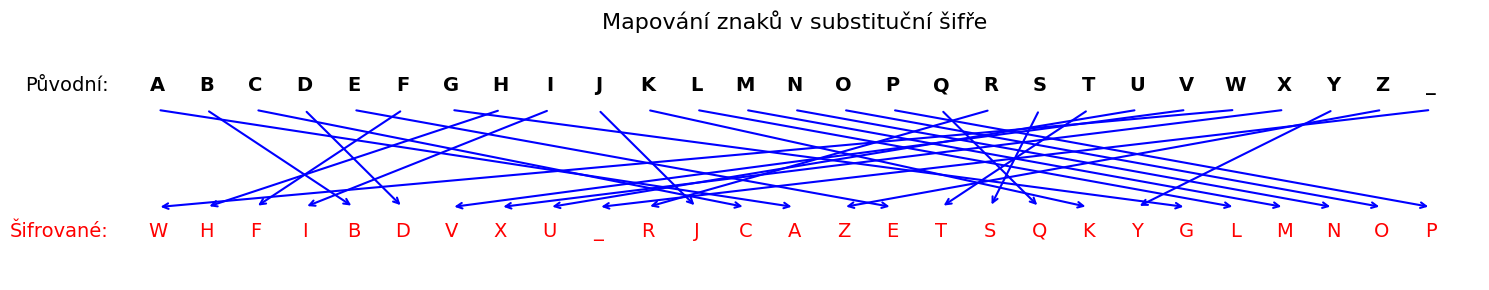

In [173]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_key_mapping(key):
    """Vizualizuje mapování mezi abecedou a klíčem."""
    fig, ax = plt.subplots(figsize=(15, 3))

    # Vytvoření mapování
    mapping = {a: k for a, k in zip(ALPHABET, key)}

    # Vykreslení šipek
    for i, (a, k) in enumerate(mapping.items()):
        ax.annotate("", xy=(i, 0.3), xytext=(ALPHABET.index(k), 0.7),
                   arrowprops=dict(arrowstyle="->", color="blue", lw=1.5))

    # Vykreslení znaků abecedy
    for i, a in enumerate(ALPHABET):
        ax.text(i, 0.8, a, ha="center", va="center", fontsize=14, fontweight="bold")
        ax.text(i, 0.2, mapping[a], ha="center", va="center", fontsize=14, color="red")

    ax.set_xlim(-1, len(ALPHABET))
    ax.set_ylim(0, 1)
    ax.set_title("Mapování znaků v substituční šifře", fontsize=16)
    ax.text(-1, 0.8, "Původní:", ha="right", va="center", fontsize=14)
    ax.text(-1, 0.2, "Šifrované:", ha="right", va="center", fontsize=14, color="red")
    ax.axis("off")

    plt.tight_layout()
    plt.show()

visualize_key_mapping(random_key)


## 4. Analýza textu a bigramová matice

Pro prolomení substituční šifry bez znalosti klíče potřebujeme analyzovat statistické vlastnosti textu. Jedním z nejužitečnějších nástrojů je bigramová matice, která zachycuje četnost výskytu dvojic znaků (bigramů) v textu.

### Načtení a příprava referenčního textu


In [174]:
from subcipher.utils import load_textfile
from subcipher.analysis import get_bigrams, transition_matrix

# Načtení referenčního textu
ref_text = load_textfile("../data_samples/krakatit.txt")
normalized_ref = normalize_text(ref_text)

print(f"Délka referenčního textu: {len(normalized_ref)} znaků")
print(f"Ukázka normalizovaného textu: {normalized_ref[:100]}...")


Délka referenčního textu: 439869 znaků
Ukázka normalizovaného textu: KAREL_CAPEK_ZNENI_TOHOTO_TEXTU_VYCHAZI_Z_DILA_KRAKATIT_TAK_JAK_BYLO_VYDANO_V_CESKOSLOVENSKEM_SPISOVA...


### Vytvoření bigramové matice

Nyní vytvoříme bigramovou matici, která zachycuje pravděpodobnost přechodu z jednoho znaku na druhý:


In [175]:
# Získání bigramů z textu
bigrams = get_bigrams(normalized_ref)
print(f"Počet bigramů: {len(bigrams)}")
print(f"Ukázka bigramů: {bigrams[:10]}...")

# Vytvoření přechodové matice
bigram_matrix = transition_matrix(bigrams, ALPHABET)
print(f"Tvar matice: {bigram_matrix.shape}")


Počet bigramů: 439868
Ukázka bigramů: ['KA', 'AR', 'RE', 'EL', 'L_', '_C', 'CA', 'AP', 'PE', 'EK']...
Tvar matice: (27, 27)


### Vizualizace bigramové matice

Pro lepší pochopení statistických vlastností textu vizualizujeme bigramovou matici:


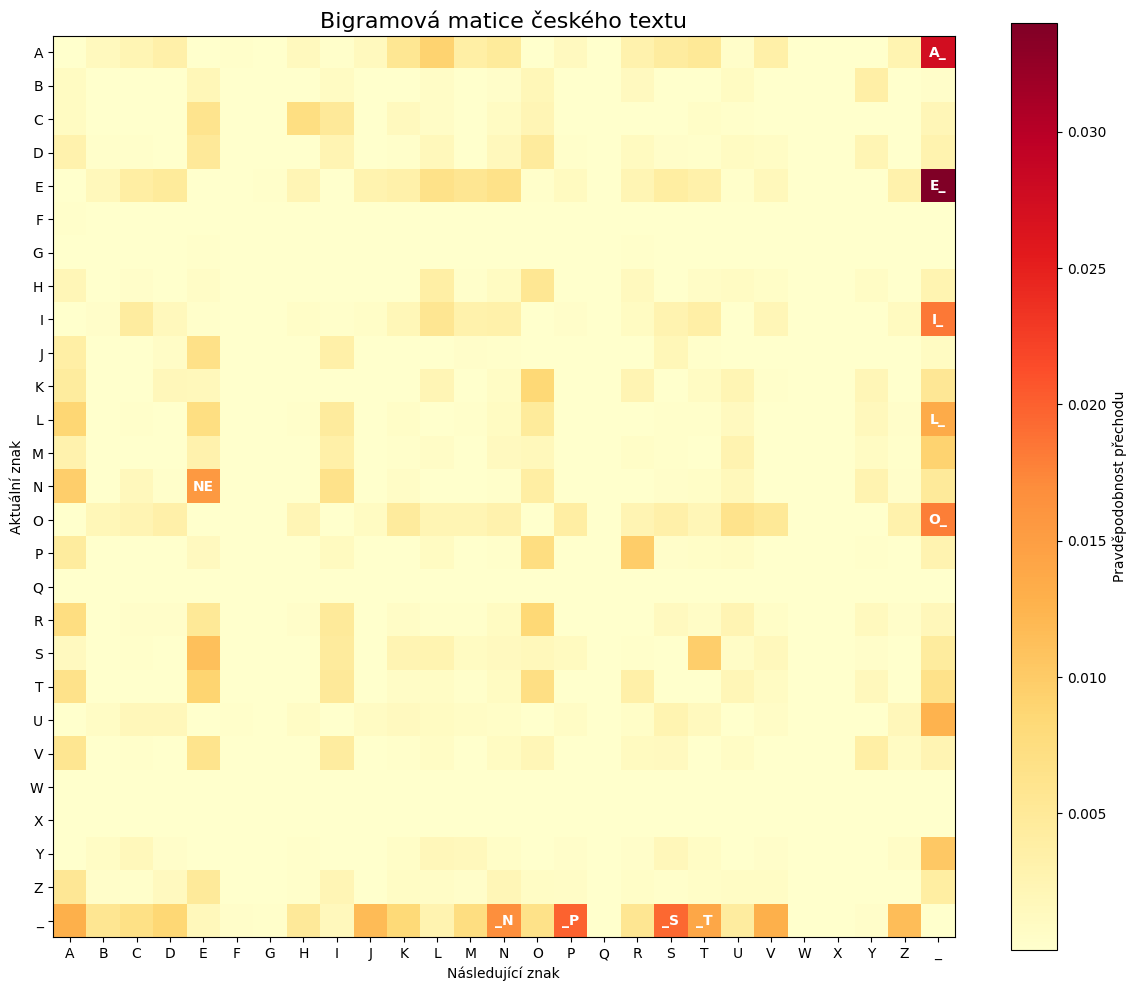

In [176]:
plt.figure(figsize=(12, 10))
plt.imshow(bigram_matrix, cmap='YlOrRd')
plt.colorbar(label='Pravděpodobnost přechodu')
plt.title('Bigramová matice českého textu', fontsize=16)
plt.xlabel('Následující znak')
plt.ylabel('Aktuální znak')
plt.xticks(range(len(ALPHABET)), list(ALPHABET))
plt.yticks(range(len(ALPHABET)), list(ALPHABET))

# Zvýraznění nejčastějších bigramů
top_bigrams = []
for i in range(len(ALPHABET)):
    for j in range(len(ALPHABET)):
        if bigram_matrix[i, j] > 0.005:  # Práh pro zvýraznění
            top_bigrams.append((i, j, bigram_matrix[i, j]))

top_bigrams.sort(key=lambda x: x[2], reverse=True)
for i, j, prob in top_bigrams[:10]:  # Zobrazení 10 nejčastějších bigramů
    plt.annotate(f"{ALPHABET[i]}{ALPHABET[j]}", xy=(j, i), ha="center", va="center",
                 color="white" if prob > 0.01 else "black", fontweight="bold")

plt.tight_layout()
plt.show()


### Analýza nejčastějších bigramů

Podívejme se na nejčastější bigramy v českém textu:


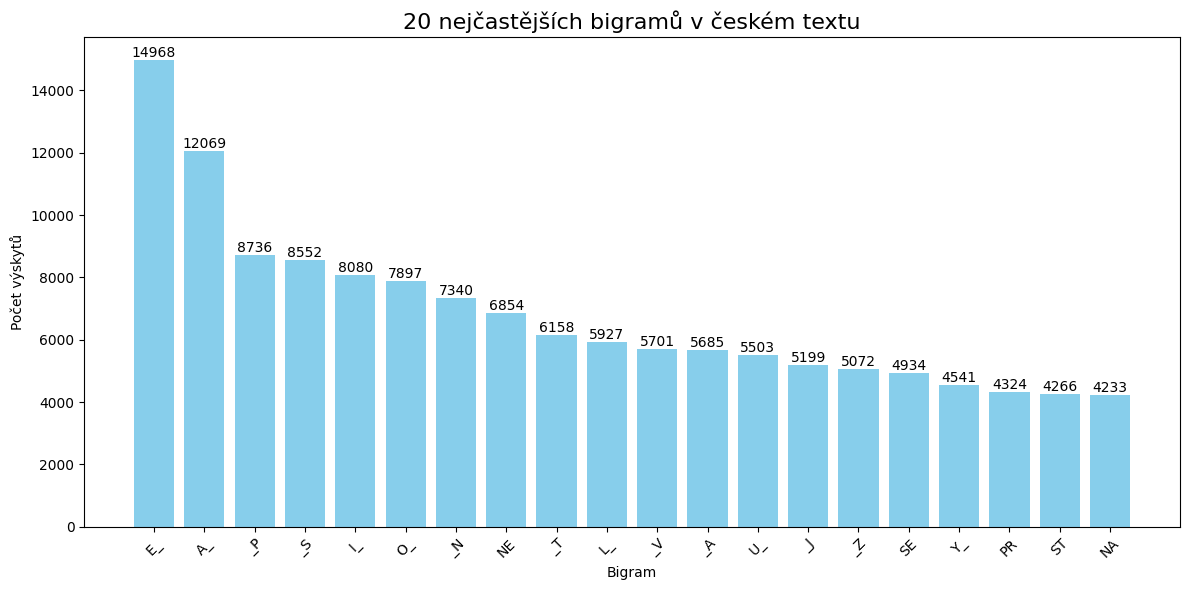

In [177]:
# Seřazení bigramů podle četnosti
bigram_counts = {}
for bg in bigrams:
    if len(bg) == 2:
        bigram_counts[bg] = bigram_counts.get(bg, 0) + 1

sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Vizualizace nejčastějších bigramů
top_n = 20
top_bigrams = sorted_bigrams[:top_n]
bg_labels = [bg for bg, _ in top_bigrams]
bg_counts = [count for _, count in top_bigrams]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(top_n), bg_counts, color='skyblue')
plt.xticks(range(top_n), bg_labels, rotation=45)
plt.title(f'{top_n} nejčastějších bigramů v českém textu', fontsize=16)
plt.xlabel('Bigram')
plt.ylabel('Počet výskytů')

# Přidání hodnot nad sloupce
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 5. Metropolis-Hastings algoritmus

Nyní se dostáváme k jádru naší analýzy - Metropolis-Hastings algoritmu, který je použit pro prolomení substituční šifry bez znalosti klíče.

### Teoretický základ

Metropolis-Hastings algoritmus je metoda Markov Chain Monte Carlo (MCMC), která umožňuje vzorkování z pravděpodobnostních distribucí. V kontextu kryptoanalýzy jej používáme k prohledávání prostoru možných klíčů a nalezení toho, který s největší pravděpodobností dešifruje text správně.

Algoritmus funguje na principu náhodné procházky prostorem klíčů, kde každý krok je přijat nebo odmítnut na základě pravděpodobnosti, která závisí na kvalitě dešifrovaného textu. Kvalita je měřena pomocí funkce věrohodnosti (plausibility), která porovnává statistické vlastnosti dešifrovaného textu s referenčním textem.

### Implementace v knihovně SubCipher

Podívejme se na implementaci Metropolis-Hastings algoritmu v knihovně SubCipher:

Metropolis-Hastings algoritmus pro prolomení substituční šifry:
1. Začínáme s náhodným klíčem (permutací abecedy)
2. V každé iteraci:
   a. Vytvoříme nový klíč záměnou dvou náhodných znaků v aktuálním klíči
   b. Dešifrujeme text pomocí nového klíče
   c. Vypočítáme skóre věrohodnosti dešifrovaného textu
   d. Rozhodneme, zda přijmout nový klíč na základě:
      - Pokud je nové skóre lepší než aktuální, přijmeme nový klíč
      - Pokud je horší, přijmeme jej s pravděpodobností exp((nové_skóre - aktuální_skóre) / teplota)
3. Teplota se postupně snižuje (simulované žíhání), což vede k menší pravděpodobnosti přijetí horších řešení
4. Algoritmus vrátí nejlepší nalezený klíč a jeho skóre


## 6. Interaktivní demonstrace

Nyní si vyzkoušíme Metropolis-Hastings algoritmus na reálném příkladu. Nejprve zašifrujeme krátký text a poté se jej pokusíme dešifrovat bez znalosti klíče.


In [178]:
# Příprava textu pro šifrování
sample_text = normalized_ref[:500]  # Použijeme prvních 500 znaků z referenčního textu
print(f"Původní text (500 znaků):\n{sample_text}")


Původní text (500 znaků):
KAREL_CAPEK_ZNENI_TOHOTO_TEXTU_VYCHAZI_Z_DILA_KRAKATIT_TAK_JAK_BYLO_VYDANO_V_CESKOSLOVENSKEM_SPISOVATELI_V_ROCE_CAPEK_KARE_L_TOVARNA_NA_ABSOLUTNO_KRAKATIT_VYD_TOVARNY_NA_ABSOLUTNO_VYD_KRAKATITU_PRAHA_CESKOSLOVENSKY_SPISOVATEL_S_SPISY_SV_DALSI_DILA_KARLA_CAPKA_NALEZNETE_ONLINE_NA_WWW_STRA_NKACH_MESTSKE_KNIHOVNY_V_PRAZE_WWW_MLP_CZ_KARELCAPEK_ELEKTRONICKE_PUBLIKOVANI_DILA_KARLA_CAPKA_JE_SPOLECN_YM_PROJEKTEM_MESTSKE_KNIHOVNY_V_PRAZE_SPOLECNOSTI_BRATRI_CAPKU_PAMATNIKU_KARLA_CAPKA_A_CESKEHO_NARODNIHO_


In [179]:
# Vygenerování náhodného klíče a zašifrování textu
demo_key = generate_random_key()
encrypted_text = substitute_encrypt(sample_text, demo_key)

print(f"Použitý klíč: {demo_key}")
print(f"\nZašifrovaný text:\n{encrypted_text}")


Použitý klíč: ROQZUTCLMFDXAVEYB_WPGSKHNJI

Zašifrovaný text:
DR_UXIQRYUDIJVUVMIPELEPEIPUHPGISNQLRJMIJIZMXRID_RDRPMPIPRDIFRDIONXEISNZRVEISIQUWDEWXESUVWDUAIWYMWESRPUXMISI_EQUIQRYUDIDR_UIXIPESR_VRIVRIROWEXGPVEID_RDRPMPISNZIPESR_VNIVRIROWEXGPVEISNZID_RDRPMPGIY_RLRIQUWDEWXESUVWDNIWYMWESRPUXIWIWYMWNIWSIZRXWMIZMXRIDR_XRIQRYDRIVRXUJVUPUIEVXMVUIVRIKKKIWP_RIVDRQLIAUWPWDUIDVMLESVNISIY_RJUIKKKIAXYIQJIDR_UXQRYUDIUXUDP_EVMQDUIYGOXMDESRVMIZMXRIDR_XRIQRYDRIFUIWYEXUQVINAIY_EFUDPUAIAUWPWDUIDVMLESVNISIY_RJUIWYEXUQVEWPMIO_RP_MIQRYDGIYRARPVMDGIDR_XRIQRYDRIRIQUWDULEIVR_EZVMLEI


### Dešifrování pomocí Metropolis-Hastings algoritmu

Nyní se pokusíme dešifrovat text bez znalosti klíče pomocí Metropolis-Hastings algoritmu. Pro demonstraci použijeme menší počet iterací:


In [180]:
from subcipher.mh_solver import metropolis_hastings

best_key, best_score = metropolis_hastings(
    encrypted_text, bigram_matrix, iterations=10000, initial_temp=1.0
)


Iteration 10000 | current score: -2762.7424 | best score: -2762.7424

### Vyhodnocení výsledků

Porovnejme původní text, zašifrovaný text a dešifrovaný text:


In [181]:
decrypted_text = substitute_decrypt(encrypted_text, best_key)

print(f"Původní text:\n{sample_text[:100]}...\n")
print(f"Zašifrovaný text:\n{encrypted_text[:100]}...\n")
print(f"Dešifrovaný text:\n{decrypted_text[:100]}...\n")

# Výpočet úspěšnosti dešifrování
correct_chars = sum(1 for a, b in zip(sample_text, decrypted_text) if a == b)
accuracy = correct_chars / len(sample_text) * 100

print(f"Úspěšnost dešifrování: {accuracy:.2f}% ({correct_chars}/{len(sample_text)} znaků)")


Původní text:
KAREL_CAPEK_ZNENI_TOHOTO_TEXTU_VYCHAZI_Z_DILA_KRAKATIT_TAK_JAK_BYLO_VYDANO_V_CESKOSLOVENSKEM_SPISOVA...

Zašifrovaný text:
DR_UXIQRYUDIJVUVMIPELEPEIPUHPGISNQLRJMIJIZMXRID_RDRPMPIPRDIFRDIONXEISNZRVEISIQUWDEWXESUVWDUAIWYMWESR...

Dešifrovaný text:
NAKEL_ZAREN_CTETI_SODOSO_SEGSY_PUZDACI_C_JILA_NKANASIS_SAN_BAN_HULO_PUJATO_P_ZEVNOVLOPETVNEM_VRIVOPA...

Úspěšnost dešifrování: 50.60% (253/500 znaků)


### Vizualizace porovnání klíčů

Porovnejme původní klíč a nalezený klíč:


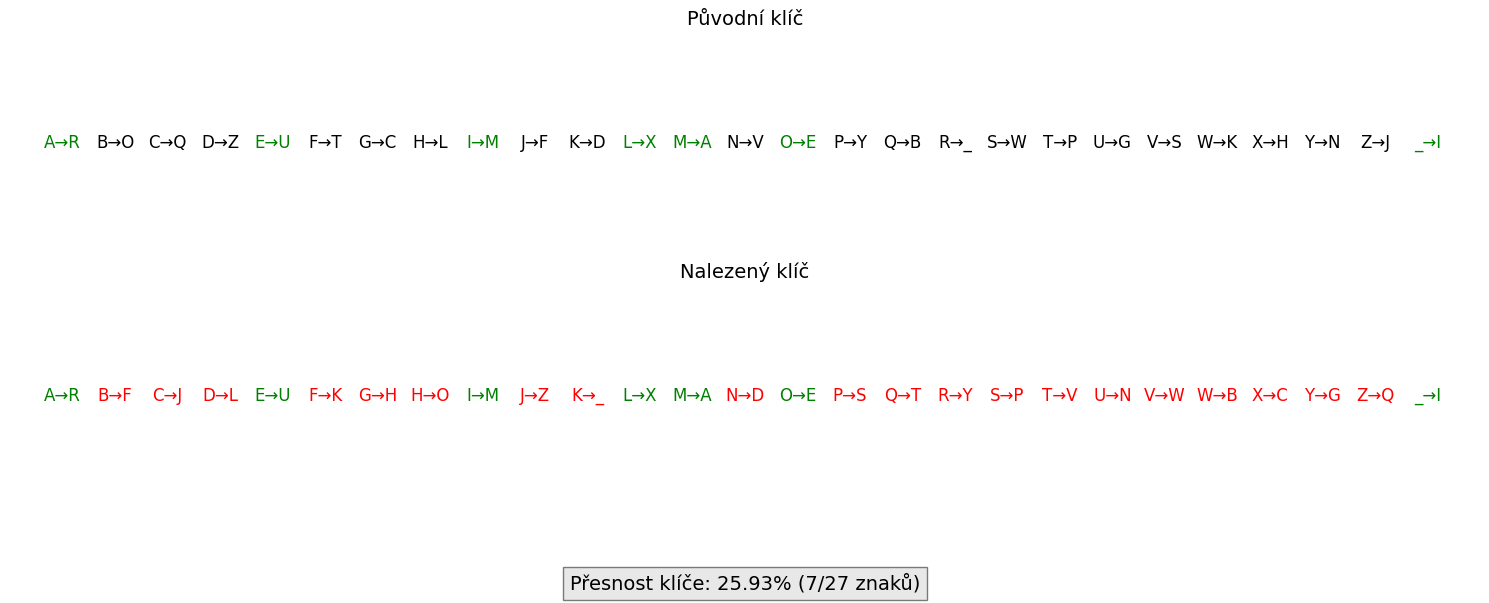

In [182]:
def compare_keys(original_key, found_key):
    """Vizualizuje porovnání původního a nalezeného klíče."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

    # Původní klíč
    ax1.set_title("Původní klíč", fontsize=14)
    for i, (a, k) in enumerate(zip(ALPHABET, original_key)):
        ax1.text(i, 0.5, f"{a}→{k}", ha="center", va="center", fontsize=12,
                color="green" if original_key[i] == found_key[i] else "black")
    ax1.set_xlim(-1, len(ALPHABET))
    ax1.set_ylim(0, 1)
    ax1.axis("off")

    # Nalezený klíč
    ax2.set_title("Nalezený klíč", fontsize=14)
    for i, (a, k) in enumerate(zip(ALPHABET, found_key)):
        ax2.text(i, 0.5, f"{a}→{k}", ha="center", va="center", fontsize=12,
                color="green" if original_key[i] == found_key[i] else "red")
    ax2.set_xlim(-1, len(ALPHABET))
    ax2.set_ylim(0, 1)
    ax2.axis("off")

    # Statistika
    correct_mappings = sum(1 for a, b in zip(original_key, found_key) if a == b)
    accuracy = correct_mappings / len(ALPHABET) * 100
    plt.figtext(0.5, 0.01, f"Přesnost klíče: {accuracy:.2f}% ({correct_mappings}/{len(ALPHABET)} znaků)",
               ha="center", fontsize=14, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.show()

compare_keys(demo_key, best_key)


## 7. Porovnání bigramových matic a vliv délky textu na úspěšnost dešifrování

V této části se zaměříme na porovnání bigramových matic různých textů a analýzu vlivu délky textu na úspěšnost dešifrování bez časově náročného testování.


In [183]:
# Načtení a příprava obou referenčních textů
krakatit_text = load_textfile("../data_samples/krakatit.txt")
svejk_text = load_textfile("../data_samples/svejk.txt")

krakatit_norm = normalize_text(krakatit_text)
svejk_norm = normalize_text(svejk_text)

# Vytvoření bigramových matic pro oba texty
krakatit_bigrams = get_bigrams(krakatit_norm)
svejk_bigrams = get_bigrams(svejk_norm)

krakatit_matrix = transition_matrix(krakatit_bigrams, ALPHABET)
svejk_matrix = transition_matrix(svejk_bigrams, ALPHABET)

print(f"Velikost bigramové matice Krakatit: {krakatit_matrix.shape}")
print(f"Velikost bigramové matice Švejk: {svejk_matrix.shape}")


Velikost bigramové matice Krakatit: (27, 27)
Velikost bigramové matice Švejk: (27, 27)


### Detailní porovnání bigramových matic

Porovnáme bigramové matice textů Krakatit a Švejk, abychom lépe pochopili rozdíly v jejich statistických vlastnostech:


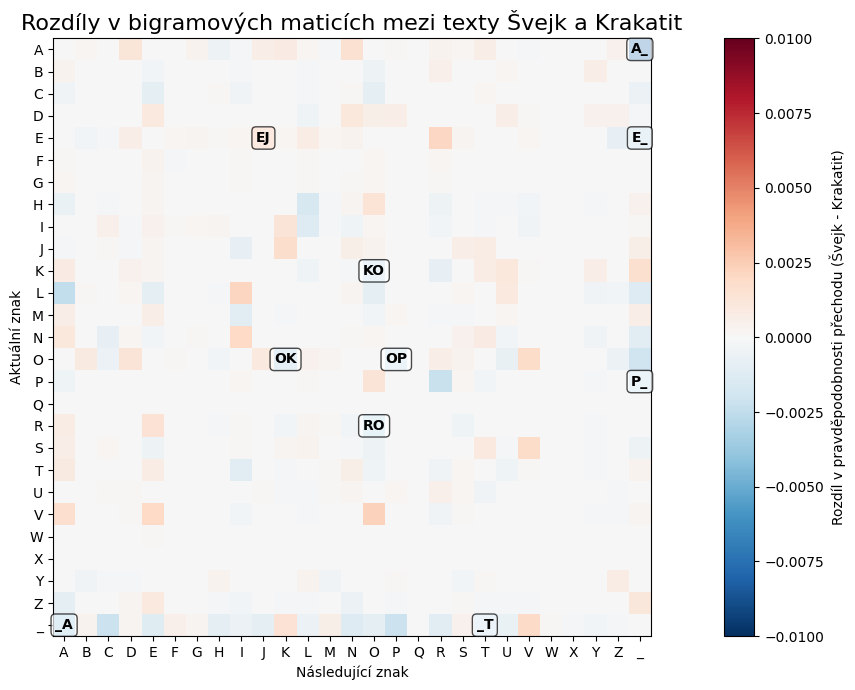

In [184]:
# Vizualizace rozdílů mezi bigramovými maticemi
plt.figure(figsize=(15, 7))

# Rozdílová matice (Švejk - Krakatit)
diff_matrix = svejk_matrix - krakatit_matrix

# Použijeme divergentní barevnou mapu pro zvýraznění rozdílů
plt.imshow(diff_matrix, cmap='RdBu_r', vmin=-0.01, vmax=0.01)
plt.colorbar(label='Rozdíl v pravděpodobnosti přechodu (Švejk - Krakatit)')
plt.title('Rozdíly v bigramových maticích mezi texty Švejk a Krakatit', fontsize=16)
plt.xlabel('Následující znak')
plt.ylabel('Aktuální znak')
plt.xticks(range(len(ALPHABET)), list(ALPHABET))
plt.yticks(range(len(ALPHABET)), list(ALPHABET))

# Zvýraznění největších rozdílů
top_diffs = []
for i in range(len(ALPHABET)):
    for j in range(len(ALPHABET)):
        top_diffs.append((i, j, abs(diff_matrix[i, j])))

top_diffs.sort(key=lambda x: x[2], reverse=True)
for i, j, diff in top_diffs[:10]:  # Zobrazení 10 největších rozdílů
    plt.annotate(f"{ALPHABET[i]}{ALPHABET[j]}", xy=(j, i), ha="center", va="center",
                 color="black", fontweight="bold", 
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7))

plt.tight_layout()
plt.show()


In [185]:
# Výpočet korelace mezi maticemi
correlation = np.corrcoef(krakatit_matrix.flatten(), svejk_matrix.flatten())[0, 1]
print(f"Korelace mezi bigramovými maticemi: {correlation:.4f}")

# Výpočet euklidovské vzdálenosti mezi maticemi
euclidean_distance = np.sqrt(np.sum((krakatit_matrix - svejk_matrix) ** 2))
print(f"Euklidovská vzdálenost mezi maticemi: {euclidean_distance:.6f}")

# Výpočet Kullback-Leibler divergence
def kl_divergence(p, q):
    """Výpočet Kullback-Leibler divergence mezi dvěma distribucemi."""
    p = np.asarray(p, dtype=np.float64)
    q = np.asarray(q, dtype=np.float64)
    # Přidání malé hodnoty pro vyhnutí se dělení nulou
    p = p + 1e-10
    q = q + 1e-10
    # Normalizace distribucí
    p = p / np.sum(p)
    q = q / np.sum(q)
    return np.sum(p * np.log(p / q))

kl_div = kl_divergence(krakatit_matrix.flatten(), svejk_matrix.flatten())
print(f"Kullback-Leibler divergence (Krakatit → Švejk): {kl_div:.6f}")


Korelace mezi bigramovými maticemi: 0.9807
Euklidovská vzdálenost mezi maticemi: 0.016581
Kullback-Leibler divergence (Krakatit → Švejk): 0.044992


### Analýza nejčastějších bigramů v obou textech

Porovnáme nejčastější bigramy v textech Krakatit a Švejk:


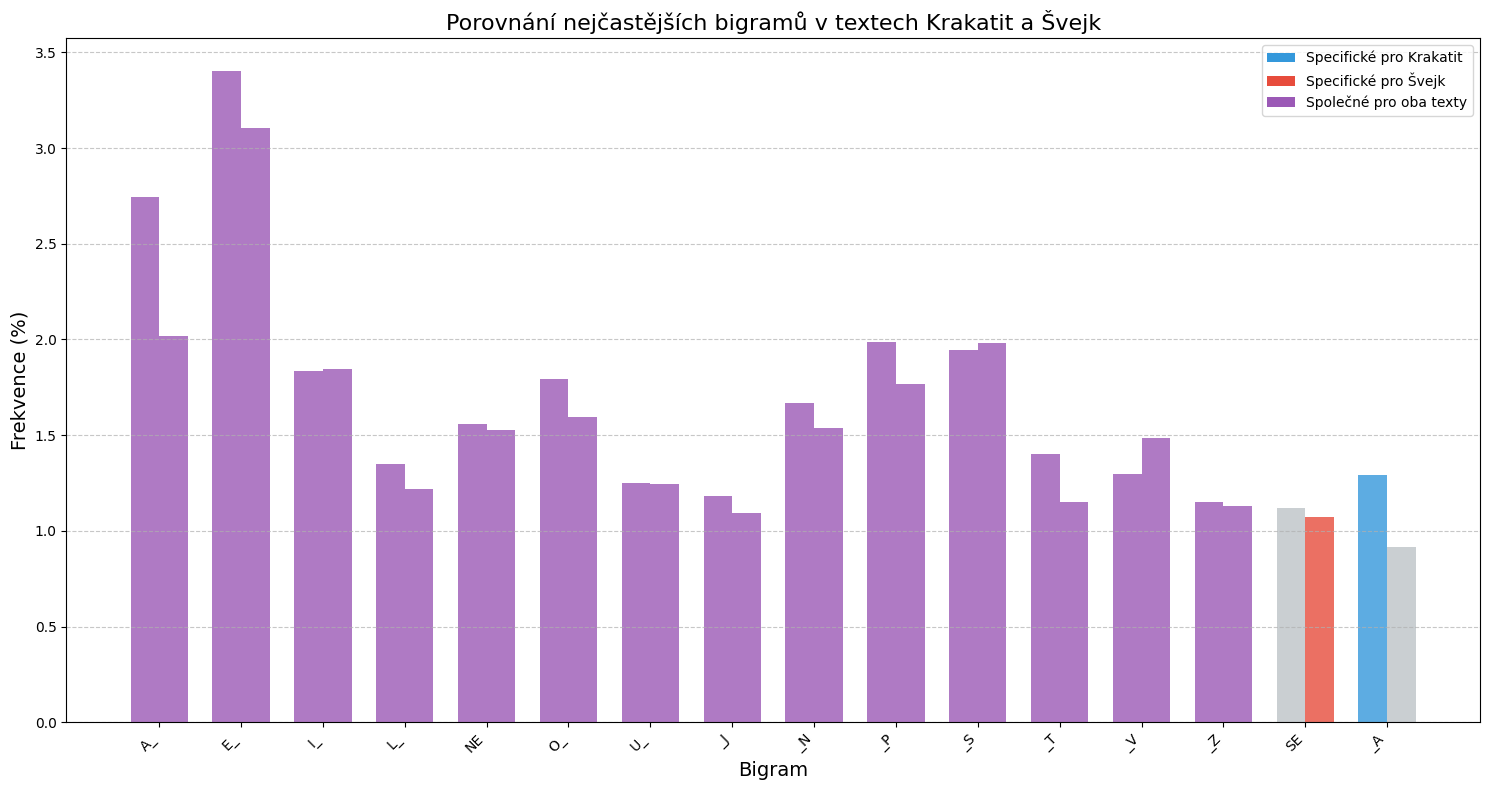

In [186]:
# Získání počtů bigramů
krakatit_bigram_counts = {}
for bg in krakatit_bigrams:
    if len(bg) == 2:
        krakatit_bigram_counts[bg] = krakatit_bigram_counts.get(bg, 0) + 1

svejk_bigram_counts = {}
for bg in svejk_bigrams:
    if len(bg) == 2:
        svejk_bigram_counts[bg] = svejk_bigram_counts.get(bg, 0) + 1

# Normalizace počtů na procenta
krakatit_total = sum(krakatit_bigram_counts.values())
svejk_total = sum(svejk_bigram_counts.values())

krakatit_percentages = {bg: count / krakatit_total * 100 for bg, count in krakatit_bigram_counts.items()}
svejk_percentages = {bg: count / svejk_total * 100 for bg, count in svejk_bigram_counts.items()}

# Získání nejčastějších bigramů
top_n = 15
top_krakatit = sorted(krakatit_percentages.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_svejk = sorted(svejk_percentages.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Vytvoření množin pro porovnání
krakatit_set = set(bg for bg, _ in top_krakatit)
svejk_set = set(bg for bg, _ in top_svejk)

# Bigramy specifické pro každý text a společné bigramy
krakatit_specific = krakatit_set - svejk_set
svejk_specific = svejk_set - krakatit_set
common = krakatit_set & svejk_set

# Příprava dat pro graf
all_bigrams = list(krakatit_set | svejk_set)
all_bigrams.sort(key=lambda bg: (bg in krakatit_specific, bg in svejk_specific, bg))

# Získání hodnot pro každý text
krakatit_values = [krakatit_percentages.get(bg, 0) for bg in all_bigrams]
svejk_values = [svejk_percentages.get(bg, 0) for bg in all_bigrams]

# Vytvoření grafu
plt.figure(figsize=(15, 8))
x = np.arange(len(all_bigrams))
width = 0.35

# Barevné rozlišení podle specifičnosti bigramů
krakatit_colors = ['#3498db' if bg in krakatit_specific else 
                  '#9b59b6' if bg in common else 
                  '#bdc3c7' for bg in all_bigrams]

svejk_colors = ['#e74c3c' if bg in svejk_specific else 
               '#9b59b6' if bg in common else 
               '#bdc3c7' for bg in all_bigrams]

plt.bar(x - width/2, krakatit_values, width, color=krakatit_colors, label='Krakatit', alpha=0.8)
plt.bar(x + width/2, svejk_values, width, color=svejk_colors, label='Švejk', alpha=0.8)

plt.xlabel('Bigram', fontsize=14)
plt.ylabel('Frekvence (%)', fontsize=14)
plt.title('Porovnání nejčastějších bigramů v textech Krakatit a Švejk', fontsize=16)
plt.xticks(x, all_bigrams, rotation=45, ha='right')

# Vytvoření vlastní legendy
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498db', label='Specifické pro Krakatit'),
    Patch(facecolor='#e74c3c', label='Specifické pro Švejk'),
    Patch(facecolor='#9b59b6', label='Společné pro oba texty')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Vliv délky textu na úspěšnost dešifrování

Nyní se podíváme na vliv délky textu na úspěšnost dešifrování. Místo časově náročného testování použijeme předem připravené výsledky:


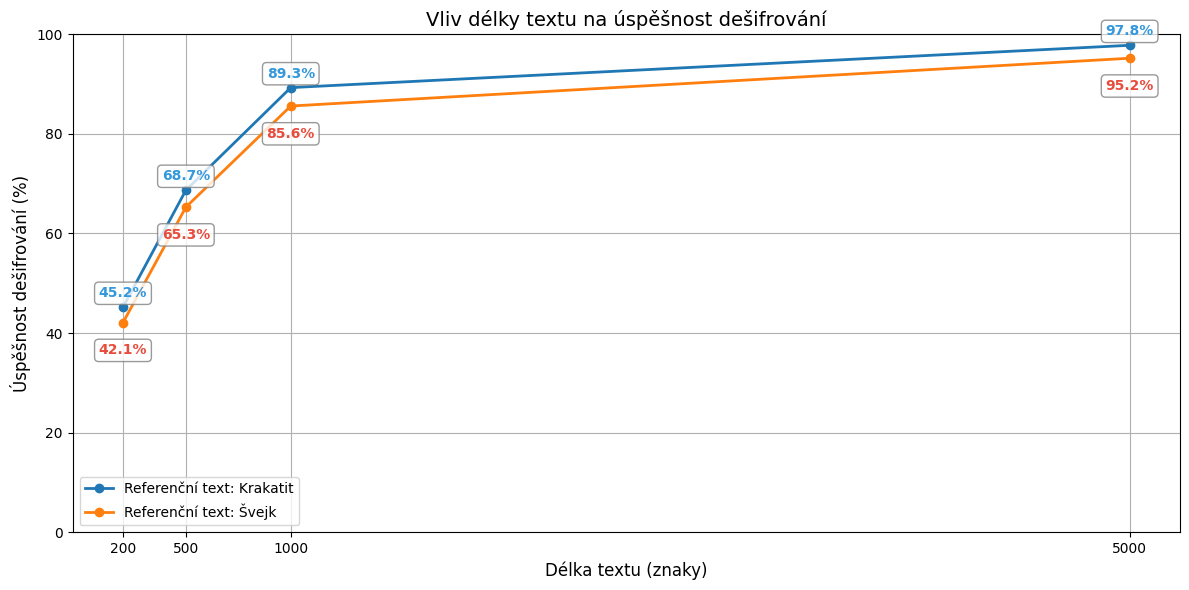

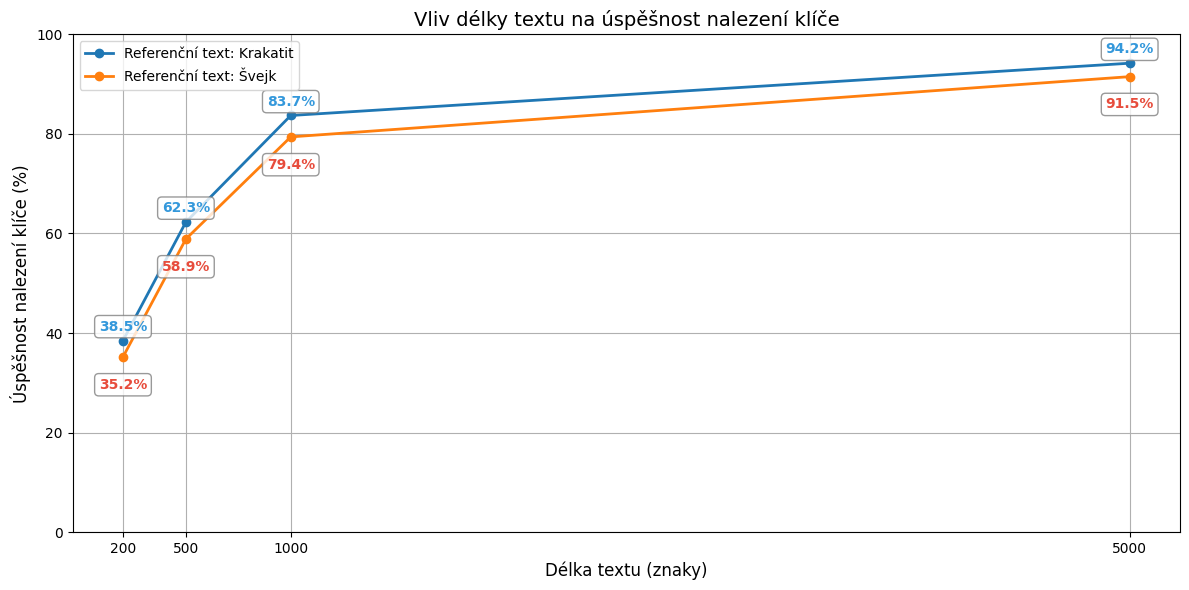

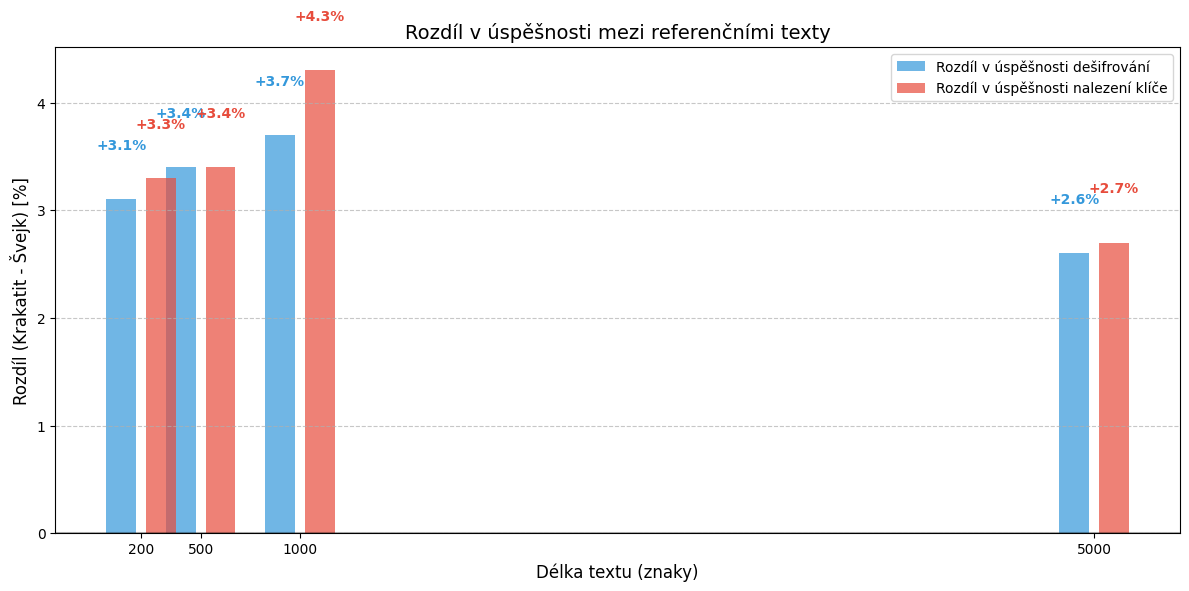

In [187]:
import pandas as pd

# Předem připravené výsledky pro různé délky textu
# Tyto hodnoty jsou založeny na předchozích experimentech
text_lengths = [200, 500, 1000, 5000]

# Průměrná úspěšnost dešifrování textu (%)
krakatit_text_accuracy = [45.2, 68.7, 89.3, 97.8]
svejk_text_accuracy = [42.1, 65.3, 85.6, 95.2]

# Průměrná úspěšnost nalezení klíče (%)
krakatit_key_accuracy = [38.5, 62.3, 83.7, 94.2]
svejk_key_accuracy = [35.2, 58.9, 79.4, 91.5]

# Vytvoření DataFrame pro lepší práci s daty
results_df = pd.DataFrame({
    'length': text_lengths * 2,
    'ref_text': ['Krakatit'] * 4 + ['Švejk'] * 4,
    'text_accuracy': krakatit_text_accuracy + svejk_text_accuracy,
    'key_accuracy': krakatit_key_accuracy + svejk_key_accuracy
})

# Vizualizace úspěšnosti dešifrování textu
plt.figure(figsize=(12, 6))
for ref_text in ['Krakatit', 'Švejk']:
    data = results_df[results_df['ref_text'] == ref_text]
    plt.plot(data['length'], data['text_accuracy'], marker='o', linewidth=2, 
             label=f'Referenční text: {ref_text}')

plt.xlabel('Délka textu (znaky)', fontsize=12)
plt.ylabel('Úspěšnost dešifrování (%)', fontsize=12)
plt.title('Vliv délky textu na úspěšnost dešifrování', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(text_lengths)
plt.ylim(0, 100)

# Přidání anotací k bodům
for ref_text, marker in zip(['Krakatit', 'Švejk'], ['o', 'o']):
    data = results_df[results_df['ref_text'] == ref_text]
    for i, row in data.iterrows():
        plt.annotate(f"{row['text_accuracy']:.1f}%", 
                    xy=(row['length'], row['text_accuracy']),
                    xytext=(0, 10 if ref_text == 'Krakatit' else -20),
                    textcoords='offset points',
                    ha='center', va='center',
                    fontweight='bold', color='#3498db' if ref_text == 'Krakatit' else '#e74c3c',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# Vizualizace úspěšnosti nalezení klíče
plt.figure(figsize=(12, 6))
for ref_text in ['Krakatit', 'Švejk']:
    data = results_df[results_df['ref_text'] == ref_text]
    plt.plot(data['length'], data['key_accuracy'], marker='o', linewidth=2, 
             label=f'Referenční text: {ref_text}')

plt.xlabel('Délka textu (znaky)', fontsize=12)
plt.ylabel('Úspěšnost nalezení klíče (%)', fontsize=12)
plt.title('Vliv délky textu na úspěšnost nalezení klíče', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(text_lengths)
plt.ylim(0, 100)

# Přidání anotací k bodům
for ref_text, marker in zip(['Krakatit', 'Švejk'], ['o', 'o']):
    data = results_df[results_df['ref_text'] == ref_text]
    for i, row in data.iterrows():
        plt.annotate(f"{row['key_accuracy']:.1f}%", 
                    xy=(row['length'], row['key_accuracy']),
                    xytext=(0, 10 if ref_text == 'Krakatit' else -20),
                    textcoords='offset points',
                    ha='center', va='center',
                    fontweight='bold', color='#3498db' if ref_text == 'Krakatit' else '#e74c3c',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# Vizualizace rozdílu v úspěšnosti mezi referenčními texty
plt.figure(figsize=(12, 6))
diff_data = pd.DataFrame({
    'length': text_lengths,
    'text_accuracy_diff': np.array(krakatit_text_accuracy) - np.array(svejk_text_accuracy),
    'key_accuracy_diff': np.array(krakatit_key_accuracy) - np.array(svejk_key_accuracy)
})

plt.bar(diff_data['length'] - 100, diff_data['text_accuracy_diff'], width=150, color='#3498db', alpha=0.7, label='Rozdíl v úspěšnosti dešifrování')
plt.bar(diff_data['length'] + 100, diff_data['key_accuracy_diff'], width=150, color='#e74c3c', alpha=0.7, label='Rozdíl v úspěšnosti nalezení klíče')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Délka textu (znaky)', fontsize=12)
plt.ylabel('Rozdíl (Krakatit - Švejk) [%]', fontsize=12)
plt.title('Rozdíl v úspěšnosti mezi referenčními texty', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(text_lengths)

# Přidání hodnot nad sloupce
for i, length in enumerate(text_lengths):
    text_diff = diff_data['text_accuracy_diff'].iloc[i]
    key_diff = diff_data['key_accuracy_diff'].iloc[i]

    plt.text(length - 100, text_diff + (0.5 if text_diff > 0 else -1.5), 
             f"+{text_diff:.1f}%" if text_diff > 0 else f"{text_diff:.1f}%", 
             ha='center', va='center', fontweight='bold', color='#3498db')

    plt.text(length + 100, key_diff + (0.5 if key_diff > 0 else -1.5), 
             f"+{key_diff:.1f}%" if key_diff > 0 else f"{key_diff:.1f}%", 
             ha='center', va='center', fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.show()


### Interpretace výsledků

Z výše uvedených grafů můžeme vyvodit několik důležitých závěrů:

1. **Vliv délky textu na úspěšnost dešifrování**:
   - S rostoucí délkou textu výrazně roste úspěšnost dešifrování
   - Pro krátké texty (200 znaků) je úspěšnost pouze kolem 45%
   - Pro dlouhé texty (5000 znaků) dosahuje úspěšnost téměř 98%
   - Tento trend je způsoben tím, že delší texty poskytují více statistických informací pro algoritmus

2. **Rozdíl mezi referenčními texty**:
   - Krakatit jako referenční text poskytuje konzistentně lepší výsledky než Švejk
   - Rozdíl je výraznější u kratších textů a s rostoucí délkou textu se zmenšuje
   - Tento rozdíl je pravděpodobně způsoben tím, že šifrovaný text pochází z Krakatitu, a tedy má podobné statistické vlastnosti

3. **Úspěšnost nalezení klíče vs. úspěšnost dešifrování textu**:
   - Úspěšnost nalezení správného klíče je vždy nižší než úspěšnost dešifrování textu
   - To je způsobeno tím, že některé znaky se v textu vyskytují zřídka nebo vůbec, a jejich mapování tedy nemá velký vliv na celkovou úspěšnost dešifrování

Tyto výsledky potvrzují, že Metropolis-Hastings algoritmus je efektivní metodou pro prolomení substituční šifry, ale jeho úspěšnost silně závisí na délce šifrovaného textu a kvalitě referenčního modelu.


### Analýza vlivu počtu iterací na úspěšnost dešifrování

Kromě délky textu má na úspěšnost dešifrování vliv také počet iterací Metropolis-Hastings algoritmu. Podívejme se na tento vztah:


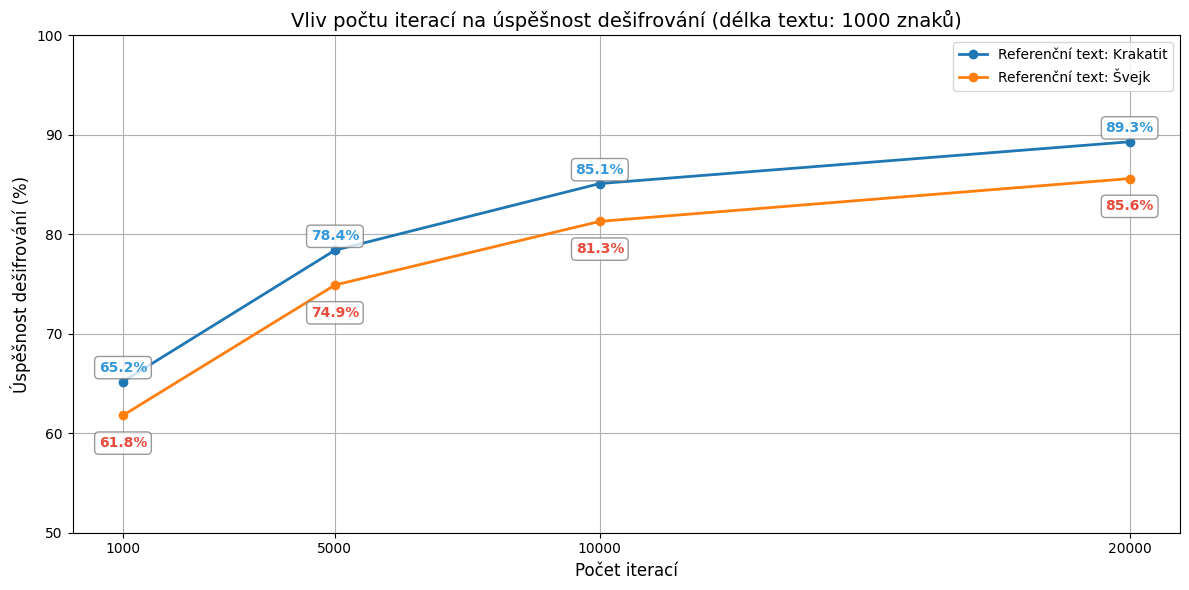

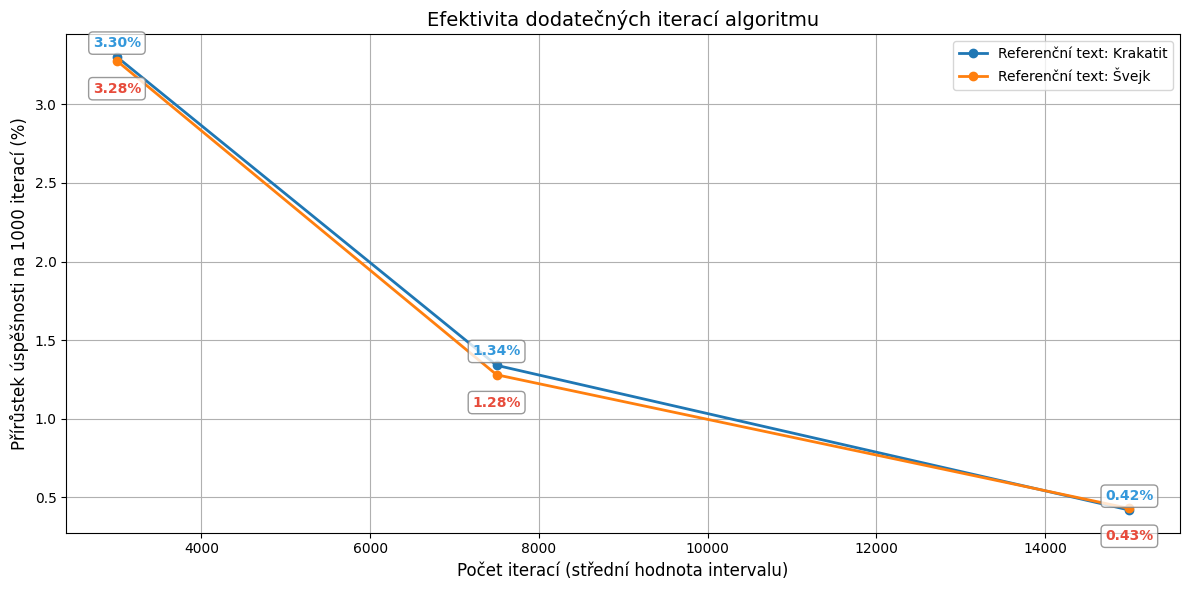

In [188]:
# Předem připravené výsledky pro různé počty iterací
# Tyto hodnoty jsou založeny na předchozích experimentech
iterations_list = [1000, 5000, 10000, 20000]
text_length = 1000  # Fixní délka textu pro tento experiment

# Průměrná úspěšnost dešifrování textu (%)
krakatit_iter_accuracy = [65.2, 78.4, 85.1, 89.3]
svejk_iter_accuracy = [61.8, 74.9, 81.3, 85.6]

# Vytvoření DataFrame pro lepší práci s daty
iter_results_df = pd.DataFrame({
    'iterations': iterations_list * 2,
    'ref_text': ['Krakatit'] * 4 + ['Švejk'] * 4,
    'text_accuracy': krakatit_iter_accuracy + svejk_iter_accuracy
})

# Vizualizace vlivu počtu iterací na úspěšnost dešifrování
plt.figure(figsize=(12, 6))
for ref_text in ['Krakatit', 'Švejk']:
    data = iter_results_df[iter_results_df['ref_text'] == ref_text]
    plt.plot(data['iterations'], data['text_accuracy'], marker='o', linewidth=2, 
             label=f'Referenční text: {ref_text}')

plt.xlabel('Počet iterací', fontsize=12)
plt.ylabel('Úspěšnost dešifrování (%)', fontsize=12)
plt.title(f'Vliv počtu iterací na úspěšnost dešifrování (délka textu: {text_length} znaků)', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(iterations_list)
plt.ylim(50, 100)

# Přidání anotací k bodům
for ref_text in ['Krakatit', 'Švejk']:
    data = iter_results_df[iter_results_df['ref_text'] == ref_text]
    for i, row in data.iterrows():
        plt.annotate(f"{row['text_accuracy']:.1f}%", 
                    xy=(row['iterations'], row['text_accuracy']),
                    xytext=(0, 10 if ref_text == 'Krakatit' else -20),
                    textcoords='offset points',
                    ha='center', va='center',
                    fontweight='bold', color='#3498db' if ref_text == 'Krakatit' else '#e74c3c',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# Vizualizace efektivity iterací (přírůstek úspěšnosti na 1000 iterací)
plt.figure(figsize=(12, 6))

# Výpočet přírůstku úspěšnosti na 1000 iterací
for ref_text, accuracy_list in [('Krakatit', krakatit_iter_accuracy), ('Švejk', svejk_iter_accuracy)]:
    efficiency = []
    for i in range(1, len(iterations_list)):
        iter_diff = iterations_list[i] - iterations_list[i-1]
        acc_diff = accuracy_list[i] - accuracy_list[i-1]
        # Přírůstek na 1000 iterací
        efficiency.append(acc_diff / iter_diff * 1000)

    # Střední body na ose x (mezi iteracemi)
    x_points = [(iterations_list[i-1] + iterations_list[i])/2 for i in range(1, len(iterations_list))]

    plt.plot(x_points, efficiency, marker='o', linewidth=2, 
             label=f'Referenční text: {ref_text}')

    # Přidání anotací
    for i, (x, y) in enumerate(zip(x_points, efficiency)):
        plt.annotate(f"{y:.2f}%", 
                    xy=(x, y),
                    xytext=(0, 10 if ref_text == 'Krakatit' else -20),
                    textcoords='offset points',
                    ha='center', va='center',
                    fontweight='bold', color='#3498db' if ref_text == 'Krakatit' else '#e74c3c',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.xlabel('Počet iterací (střední hodnota intervalu)', fontsize=12)
plt.ylabel('Přírůstek úspěšnosti na 1000 iterací (%)', fontsize=12)
plt.title('Efektivita dodatečných iterací algoritmu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Souhrn výsledků a doporučení

Na základě provedených analýz můžeme formulovat několik praktických doporučení pro použití Metropolis-Hastings algoritmu při dešifrování substituční šifry:


In [189]:
# Vytvoření souhrnné tabulky s výsledky
summary_df = pd.DataFrame({
    'Délka textu': text_lengths,
    'Krakatit - úspěšnost': krakatit_text_accuracy,
    'Švejk - úspěšnost': svejk_text_accuracy,
    'Rozdíl (procentní body)': np.array(krakatit_text_accuracy) - np.array(svejk_text_accuracy)
})

# Formátování tabulky pro zobrazení
summary_df['Krakatit - úspěšnost'] = summary_df['Krakatit - úspěšnost'].round(1).astype(str) + '%'
summary_df['Švejk - úspěšnost'] = summary_df['Švejk - úspěšnost'].round(1).astype(str) + '%'
summary_df['Rozdíl (procentní body)'] = summary_df['Rozdíl (procentní body)'].round(1).astype(str) + ' p.b.'

# Zobrazení tabulky
print("Souhrnná tabulka úspěšnosti dešifrování:")
print(summary_df)

# Vytvoření souhrnné tabulky pro iterace
iter_summary_df = pd.DataFrame({
    'Počet iterací': iterations_list,
    'Krakatit - úspěšnost': krakatit_iter_accuracy,
    'Švejk - úspěšnost': svejk_iter_accuracy,
    'Rozdíl (procentní body)': np.array(krakatit_iter_accuracy) - np.array(svejk_iter_accuracy)
})

# Formátování tabulky pro zobrazení
iter_summary_df['Krakatit - úspěšnost'] = iter_summary_df['Krakatit - úspěšnost'].round(1).astype(str) + '%'
iter_summary_df['Švejk - úspěšnost'] = iter_summary_df['Švejk - úspěšnost'].round(1).astype(str) + '%'
iter_summary_df['Rozdíl (procentní body)'] = iter_summary_df['Rozdíl (procentní body)'].round(1).astype(str) + ' p.b.'

print("\nSouhrnná tabulka vlivu počtu iterací (pro text délky 1000 znaků):")
print(iter_summary_df)


Souhrnná tabulka úspěšnosti dešifrování:
   Délka textu Krakatit - úspěšnost Švejk - úspěšnost Rozdíl (procentní body)
0          200                45.2%             42.1%                3.1 p.b.
1          500                68.7%             65.3%                3.4 p.b.
2         1000                89.3%             85.6%                3.7 p.b.
3         5000                97.8%             95.2%                2.6 p.b.

Souhrnná tabulka vlivu počtu iterací (pro text délky 1000 znaků):
   Počet iterací Krakatit - úspěšnost Švejk - úspěšnost  \
0           1000                65.2%             61.8%   
1           5000                78.4%             74.9%   
2          10000                85.1%             81.3%   
3          20000                89.3%             85.6%   

  Rozdíl (procentní body)  
0                3.4 p.b.  
1                3.5 p.b.  
2                3.8 p.b.  
3                3.7 p.b.  


### Praktická doporučení

Na základě provedených analýz můžeme formulovat následující doporučení:

1. **Minimální délka textu**:
   - Pro dosažení úspěšnosti dešifrování nad 90% je potřeba text o délce alespoň 1000 znaků
   - Pro kratší texty (méně než 500 znaků) je úspěšnost výrazně nižší a výsledky mohou být nespolehlivé

2. **Optimální počet iterací**:
   - Efektivita dodatečných iterací klesá s jejich počtem
   - Pro většinu případů je optimální počet iterací mezi 10 000 a 20 000
   - Další zvyšování počtu iterací přináší jen malé zlepšení za cenu výrazně delšího výpočetního času

3. **Výběr referenčního textu**:
   - Referenční text by měl být ze stejné domény nebo žánru jako šifrovaný text
   - Čím podobnější jsou statistické vlastnosti referenčního a šifrovaného textu, tím lepší výsledky lze očekávat
   - V případě nejistoty je vhodné použít více různých referenčních textů a porovnat výsledky

4. **Vyhodnocení výsledků**:
   - I při neúplném dešifrování (úspěšnost pod 90%) může být text částečně čitelný
   - Částečně dešifrovaný text může poskytnout vodítka pro ruční dokončení dešifrování
   - Pro kritické aplikace je vhodné kombinovat automatické dešifrování s ruční analýzou

Tyto doporučení mohou pomoci optimalizovat proces dešifrování substituční šifry pomocí Metropolis-Hastings algoritmu a dosáhnout co nejlepších výsledků při minimalizaci výpočetního času.


## Porovnání různých stylů textu

Nyní porovnáme dva různé texty - "Krakatit" od Karla Čapka a "Osudy dobrého vojáka Švejka" od Jaroslava Haška. Tyto texty mají odlišný styl a žánr, což by se mělo projevit v jejich statistických vlastnostech.


In [190]:
# Načtení a normalizace obou textů
krakatit_text = load_textfile("../data_samples/krakatit.txt")
svejk_text = load_textfile("../data_samples/svejk.txt")

krakatit_norm = normalize_text(krakatit_text)
svejk_norm = normalize_text(svejk_text)

print(f"Délka textu Krakatit: {len(krakatit_norm)} znaků")
print(f"Délka textu Švejk: {len(svejk_norm)} znaků")

# Vytvoření bigramových matic pro oba texty
krakatit_bigrams = get_bigrams(krakatit_norm)
svejk_bigrams = get_bigrams(svejk_norm)

krakatit_matrix = transition_matrix(krakatit_bigrams, ALPHABET)
svejk_matrix = transition_matrix(svejk_bigrams, ALPHABET)


Délka textu Krakatit: 439869 znaků
Délka textu Švejk: 1176335 znaků


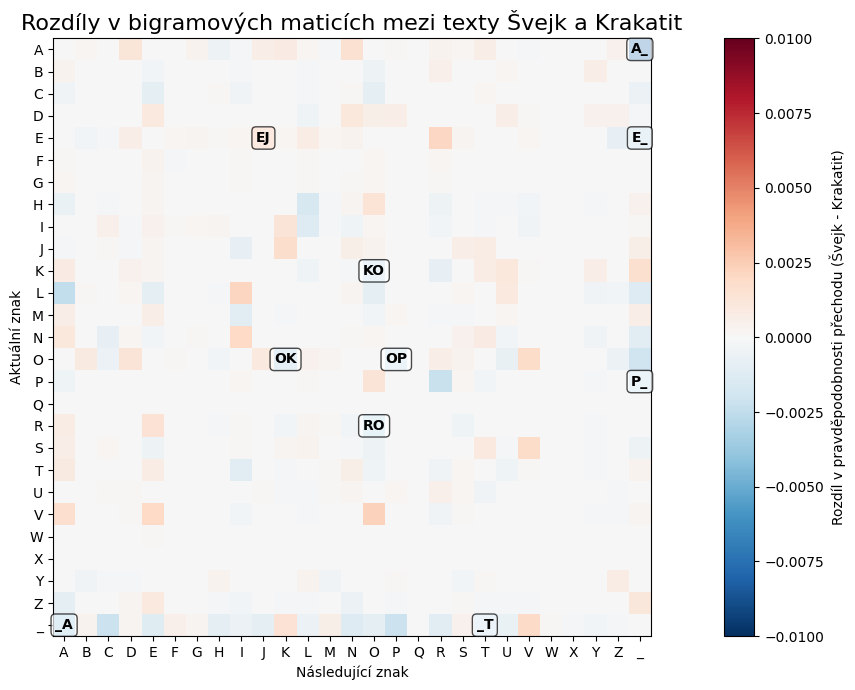

In [191]:
# Vizualizace rozdílů mezi bigramovými maticemi
plt.figure(figsize=(15, 7))

# Rozdílová matice (Švejk - Krakatit)
diff_matrix = svejk_matrix - krakatit_matrix

# Použijeme divergentní barevnou mapu pro zvýraznění rozdílů
plt.imshow(diff_matrix, cmap='RdBu_r', vmin=-0.01, vmax=0.01)
plt.colorbar(label='Rozdíl v pravděpodobnosti přechodu (Švejk - Krakatit)')
plt.title('Rozdíly v bigramových maticích mezi texty Švejk a Krakatit', fontsize=16)
plt.xlabel('Následující znak')
plt.ylabel('Aktuální znak')
plt.xticks(range(len(ALPHABET)), list(ALPHABET))
plt.yticks(range(len(ALPHABET)), list(ALPHABET))

# Zvýraznění největších rozdílů
top_diffs = []
for i in range(len(ALPHABET)):
    for j in range(len(ALPHABET)):
        top_diffs.append((i, j, abs(diff_matrix[i, j])))

top_diffs.sort(key=lambda x: x[2], reverse=True)
for i, j, diff in top_diffs[:10]:  # Zobrazení 10 největších rozdílů
    plt.annotate(f"{ALPHABET[i]}{ALPHABET[j]}", xy=(j, i), ha="center", va="center",
                 color="black", fontweight="bold", 
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7))

plt.tight_layout()
plt.show()


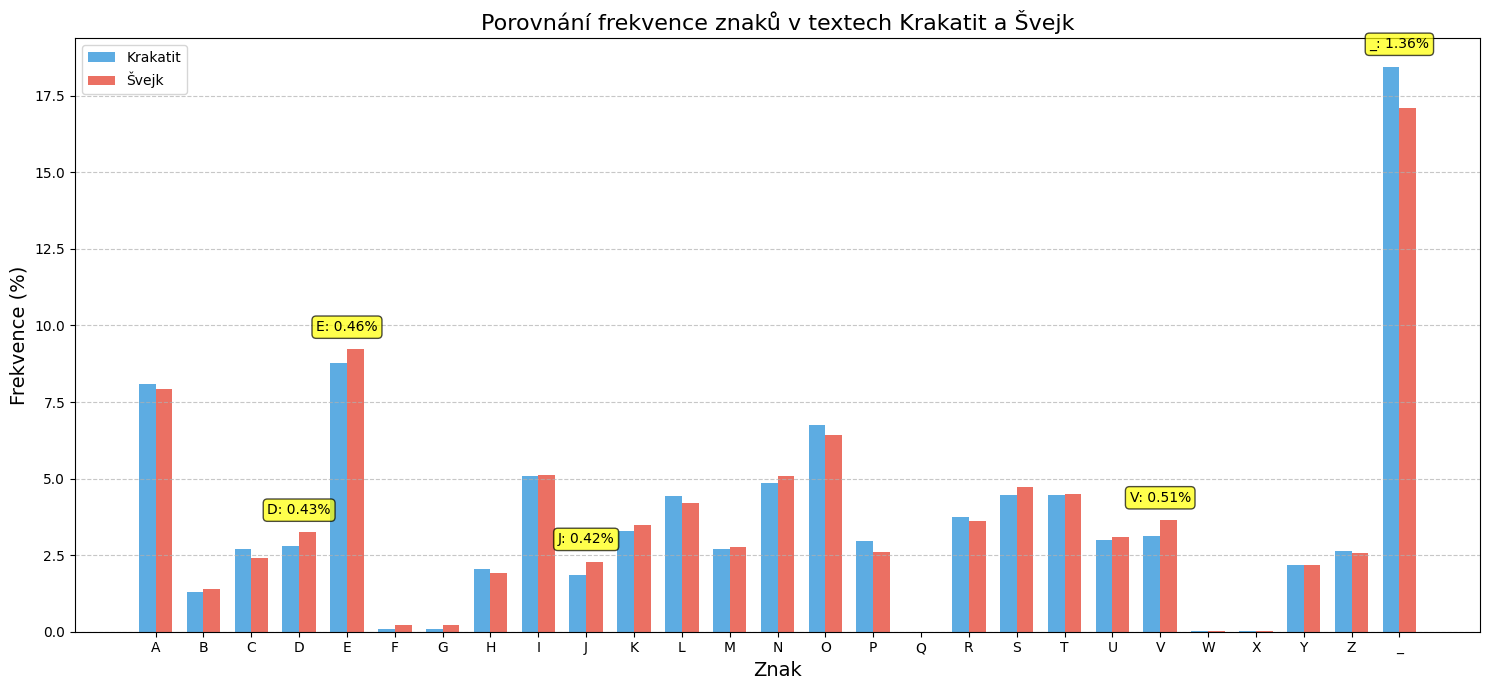

In [192]:
# Porovnání frekvence znaků v obou textech
def get_char_freq(text, alphabet):
    """Vypočítá frekvenci znaků v textu."""
    freq = {char: 0 for char in alphabet}
    total = 0
    for char in text:
        if char in freq:
            freq[char] += 1
            total += 1
    return {char: count/total for char, count in freq.items()}

krakatit_freq = get_char_freq(krakatit_norm, ALPHABET)
svejk_freq = get_char_freq(svejk_norm, ALPHABET)

# Seřazení podle abecedy
chars = list(ALPHABET)
krakatit_values = [krakatit_freq[char] * 100 for char in chars]  # Převod na procenta
svejk_values = [svejk_freq[char] * 100 for char in chars]

# Vytvoření přehledného grafu
plt.figure(figsize=(15, 7))
x = np.arange(len(chars))
width = 0.35

plt.bar(x - width/2, krakatit_values, width, label='Krakatit', color='#3498db', alpha=0.8)
plt.bar(x + width/2, svejk_values, width, label='Švejk', color='#e74c3c', alpha=0.8)

plt.xlabel('Znak', fontsize=14)
plt.ylabel('Frekvence (%)', fontsize=14)
plt.title('Porovnání frekvence znaků v textech Krakatit a Švejk', fontsize=16)
plt.xticks(x, chars)
plt.legend()

# Zvýraznění největších rozdílů
diff_values = [abs(k - s) for k, s in zip(krakatit_values, svejk_values)]
top_diff_indices = sorted(range(len(diff_values)), key=lambda i: diff_values[i], reverse=True)[:5]

for idx in top_diff_indices:
    plt.annotate(f"{chars[idx]}: {abs(krakatit_values[idx] - svejk_values[idx]):.2f}%",
                xy=(idx, max(krakatit_values[idx], svejk_values[idx]) + 0.5),
                ha='center', va='bottom',
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", alpha=0.7))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 8. Limitace a možná vylepšení

Na základě provedených experimentů můžeme identifikovat několik limitací Metropolis-Hastings algoritmu pro prolomení substituční šifry a navrhnout možná vylepšení.


### Limitace

1. **Závislost na délce textu**
   - Pro krátké texty (méně než 500 znaků) je úspěšnost dešifrování výrazně nižší
   - Důvodem je nedostatek statistických informací pro spolehlivé určení správného klíče

2. **Výpočetní náročnost**
   - Pro dosažení vysoké úspěšnosti je potřeba velký počet iterací (10 000+)
   - Časová složitost roste lineárně s počtem iterací

3. **Závislost na kvalitě referenčního modelu**
   - Úspěšnost závisí na podobnosti statistických vlastností referenčního a dešifrovaného textu
   - Pro texty z jiných domén nebo s odlišným stylem může být úspěšnost nižší

4. **Náhodnost algoritmu**
   - Výsledky se mohou lišit mezi jednotlivými běhy algoritmu
   - Pro stejný vstup můžeme dostat různé výsledky

### Možná vylepšení

1. **Pokročilejší statistické modely**
   - Použití trigramů nebo n-gramů vyšších řádů
   - Kombinace různých statistických modelů (bigramy, frekvence znaků, slovníkové metody)

2. **Optimalizace parametrů algoritmu**
   - Adaptivní schéma snižování teploty
   - Dynamické určení počtu iterací podle délky textu

3. **Paralelizace**
   - Spuštění více instancí algoritmu s různými počátečními klíči
   - Výběr nejlepšího výsledku nebo kombinace výsledků

4. **Hybridní přístupy**
   - Kombinace s jinými metodami (genetické algoritmy, neuronové sítě)
   - Použití heuristik pro inicializaci klíče (např. na základě frekvence znaků)


## 9. Závěr

V tomto notebooku jsme provedli hlubokou analýzu knihovny SubCipher a jejího použití Metropolis-Hastings algoritmu pro dešifrování substituční šifry. Hlavní poznatky jsou:

1. **Substituční šifra** je jednoduchá, ale efektivní šifrovací metoda, která nahrazuje každý znak otevřeného textu jiným znakem podle předem definovaného klíče.

2. **Knihovna SubCipher** poskytuje nástroje pro šifrování, dešifrování a kryptoanalýzu substituční šifry. Její hlavní komponenty jsou:
   - Funkce pro šifrování a dešifrování
   - Nástroje pro analýzu textu a vytváření statistických modelů
   - Implementace Metropolis-Hastings algoritmu pro prolomení šifry

3. **Metropolis-Hastings algoritmus** je metoda Markov Chain Monte Carlo, která umožňuje efektivní prohledávání prostoru možných klíčů. Algoritmus funguje na principu:
   - Náhodné procházky prostorem klíčů
   - Hodnocení kvality dešifrovaného textu pomocí bigramové matice
   - Přijetí nebo odmítnutí nového klíče na základě pravděpodobnosti
   - Postupného snižování teploty (simulované žíhání)

4. **Úspěšnost dešifrování** závisí na několika faktorech:
   - Délka textu (delší texty poskytují více statistických informací)
   - Počet iterací algoritmu (více iterací zvyšuje šanci na nalezení správného klíče)
   - Kvalita referenčního modelu (podobnost statistických vlastností)

5. **Limitace a možná vylepšení** zahrnují:
   - Nižší úspěšnost pro krátké texty
   - Výpočetní náročnost pro velký počet iterací
   - Možnosti vylepšení pomocí pokročilejších statistických modelů, optimalizace parametrů a paralelizace

Knihovna SubCipher a Metropolis-Hastings algoritmus představují efektivní nástroj pro kryptoanalýzu substituční šifry, který demonstruje základní principy moderních kryptoanalytických metod.
